In [27]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  

#scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 

ModuleNotFoundError: No module named 'missingno'

In [3]:
train=pd.read_csv('C:/Users/gptcs/Desktop/iris/Iris.csv')

In [4]:
df=train.copy()

In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.columns # names of all coumns.

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df = pd.read_csv('C:/Users/gptcs/Desktop/iris/Iris.csv')
if 'Id' in df.columns:
    df.drop('Id',axis=1,inplace=True)


In [11]:
df.index # indices of rows.

RangeIndex(start=0, stop=150, step=1)

In [12]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [13]:
msno.matrix(df) # just one final time to visualize.

NameError: name 'msno' is not defined

In [15]:
for col in df.columns:
    print("Number of values in column " ,col," : ",df[col].count())

Number of values in column  sepal_length  :  150
Number of values in column  sepal_width  :  150
Number of values in column  petal_length  :  150
Number of values in column  petal_width  :  150
Number of values in column  species  :  150


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

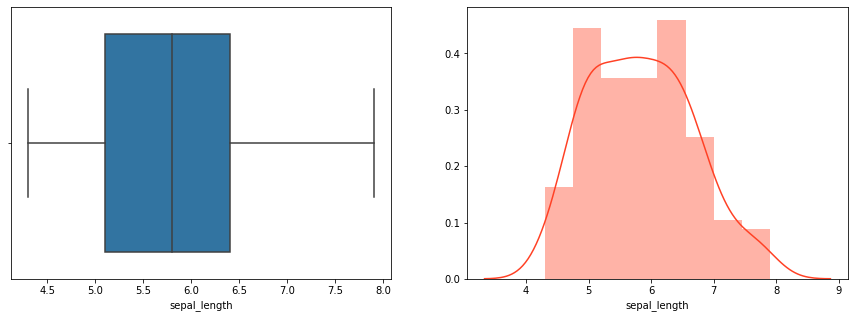

In [19]:
plot('sepal_length')

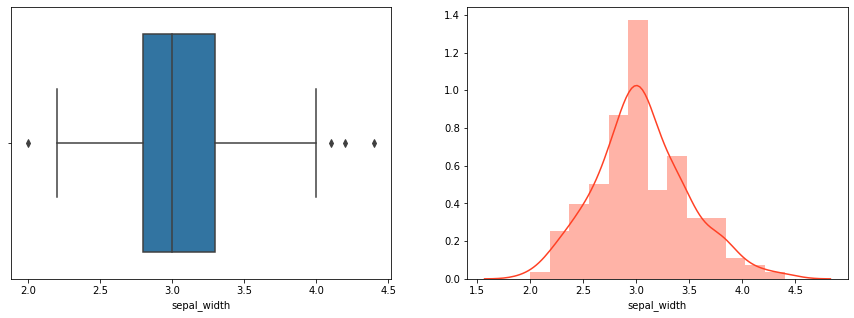

In [21]:
plot('sepal_width')

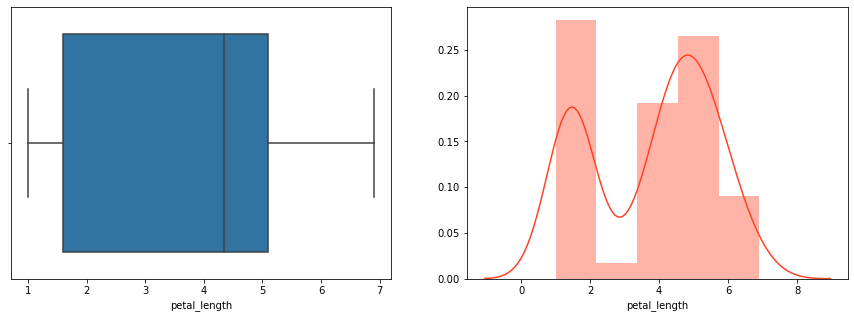

In [22]:
plot('petal_length')

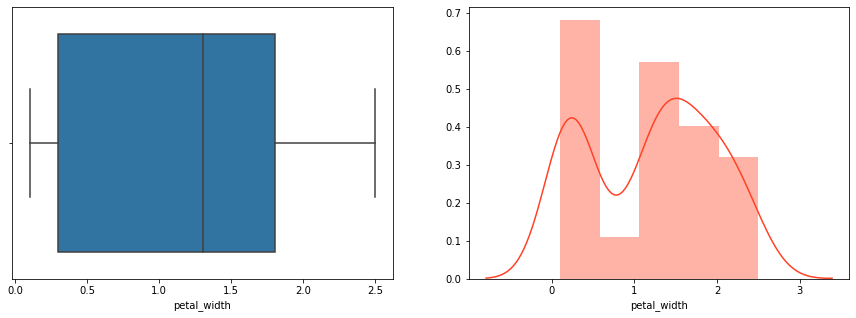

In [24]:
plot('petal_width')

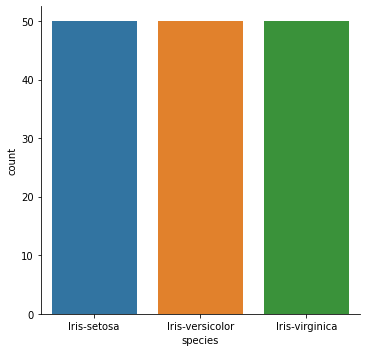

In [26]:
sns.factorplot(data=df,x='species',kind='count')

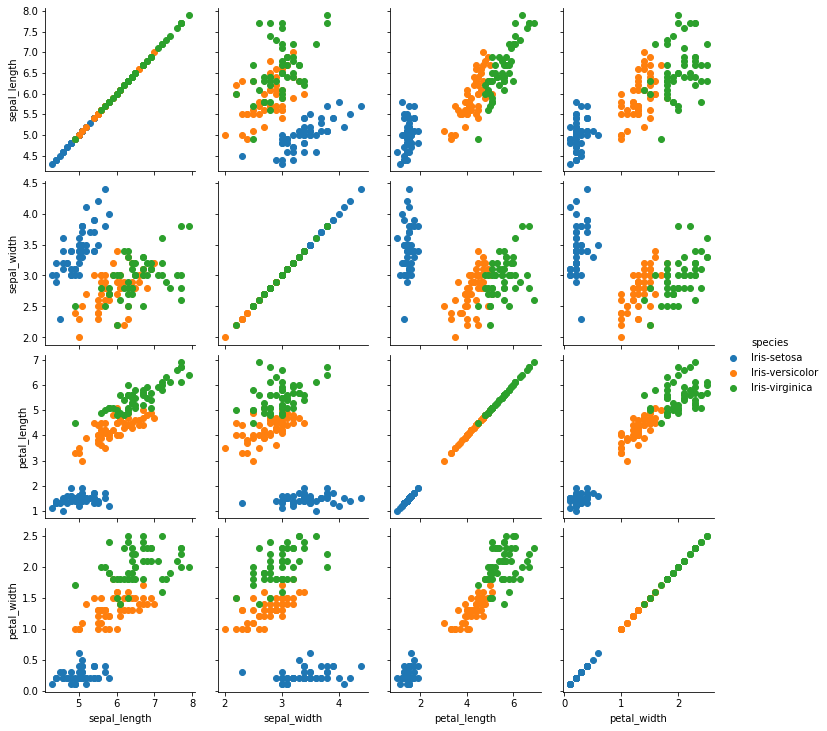

In [29]:
g = sns.PairGrid(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']], hue = "species")
g = g.map(plt.scatter).add_legend()

In [32]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [49]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('species',axis=1))
X=scaled_df
Y=df['species'].values

In [37]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [50]:
Y=df['species'].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [56]:
train_test_split(X,Y,test_size=0.20,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [57]:
train_test_split(X,Y,test_size=0.20,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [58]:
train_test_split(X,Y,test_size=0.20,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
clf_svm_lin=LinearSVC()
clf_svm_lin.fit(x_train,y_train)
pred=clf_svm_lin.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [59]:
train_test_split(X,Y,test_size=0.20,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [61]:
train_test_split(X,Y,test_size=0.20,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
models=[LogisticRegression(),LinearSVC(),SVC(),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [45]:
acc_frame=pd.DataFrame(d)
acc_frame

""


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(data=acc_frame,y='Modelling Algo',x='accuracy',kind='bar',size=5,aspect=1.5)
print(data.columns)
print("Model Accuracy:",accuracy_score_value)

ValueError: Could not interpret input 'accuracy'